# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

In [2]:
# Get the tf record files
dataset = get_dataset("/home/workspace/data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

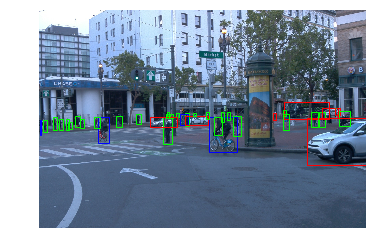

In [12]:
def display_instances(dataset):
    """
    This function takes a batch from the dataset and display an image with 
    the associated bounding boxes.

    args:
        - dataset[tf.Dataset] tensorflow dataset
    """
    # get the batch
    batch, = dataset.take(1)
    
    fig = plt.imshow(batch["image"].numpy().astype("uint8")) 
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}
    bboxes = batch["groundtruth_boxes"].numpy()
    classes = batch["groundtruth_classes"].numpy()
    imageShape = batch["original_image_spatial_shape"].numpy()
    
    # Fitting the bounding boxes coordinates to the image size
    for cl, bb in zip(classes, bboxes):
        y1, x1, y2, x2 = bb
        y1 *= imageShape[0]
        y2 *= imageShape[0]
        x1 *= imageShape[1]
        x2 *= imageShape[1]
        rec = Rectangle((x1, y1), (x2-x1), (y2-y1), facecolor='none', edgecolor=colormap[cl])
        # Add bboxes to the image
        fig.axes.add_patch(rec)
    
    plt.axis("off")
    
display_instances(dataset)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

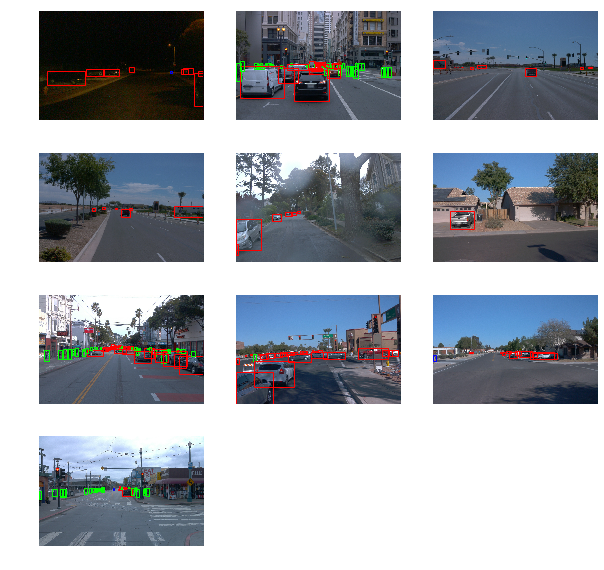

In [26]:

plt.figure(figsize=(10, 10))
colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

for i in range(10):
    data = dataset.shuffle(100, reshuffle_each_iteration=True).take(1)
    for batch in data:
        ax = plt.subplot(4, 3, i+1)
        bboxes = batch["groundtruth_boxes"].numpy()
        classes = batch["groundtruth_classes"].numpy()
        imageShape = batch["original_image_spatial_shape"].numpy()
        plt.imshow(batch['image'].numpy().astype("uint8"))

        for cl, bb, in zip(classes, bboxes):
            # Fitting the bounding boxes coordinates to the image size
            y1, x1, y2, x2 = bb
            y1 *= imageShape[0]
            y2 *= imageShape[0]
            x1 *= imageShape[1]
            x2 *= imageShape[1]
            rec = Rectangle((x1, y1), (x2-x1), (y2-y1), facecolor='none', edgecolor=colormap[cl])

            # Add bboxes to the image
            ax.add_patch(rec)

            plt.axis("off")

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

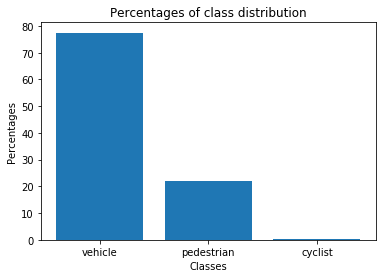

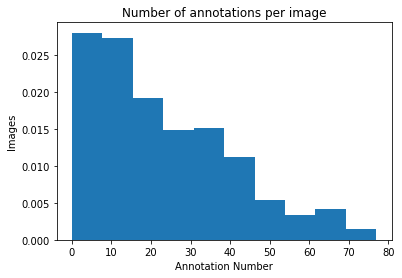

In [24]:

def display_chart(dataset):
    """
    Takes in a dataset and displays charts to analyze its data.
    
    args:
        - dataset[tf.Dataset] tensorflow dataset
    """ 

    stats = {"classIDs": [], "annNum" : [] }
    for record in dataset.take(10000):
        stats["classIDs"].extend(record["groundtruth_classes"].numpy())
        stats["annNum"].append(len(record["groundtruth_classes"].numpy()))
    distribution = np.array(stats["classIDs"])
    distribution = np.array([(distribution == 1).sum(), (distribution == 2).sum(), (distribution == 4).sum()])  
    percentages = (distribution/distribution.sum())*100
    names = np.array(["vehicle", "pedestrian", "cyclist"])

    #Bar chart for class distribution
    plt1 = plt
    plt1.bar(names, percentages)
    plt1.title("Percentages of class distribution")
    plt1.xlabel("Classes")
    plt1.ylabel("Percentages")
    plt1.show()

    #Histogram for number of annotations per images
    plt2 = plt
    plt2.hist(stats["annNum"], density=True)
    plt2.title("Number of annotations per image")
    plt2.xlabel("Annotation Number")
    plt2.ylabel("Images")
    plt2.show()

display_chart(dataset)